#### Bibliotecas

In [11]:
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import nasdaqdatalink

##### Nasdaq API Key

In [12]:
nasdaq_key = 'yUkkodwj1uqL1EPc1kdS'
nasdaqdatalink.ApiConfig.api_key = nasdaq_key

##### Período analisado

In [61]:
start_date = '31/10/2003'
end_date = '31/10/2023'

##### Criação dos DataFrames dos Indicadores Macroeconômicos

In [62]:
selic = pd.DataFrame()
confianca = pd.DataFrame()
pib = pd.DataFrame()
incc = pd.DataFrame()
ipca = pd.DataFrame()
dolar = pd.DataFrame()

##### Obtenção dos dados e inclusão nos DataFrames

In [63]:
selic['SELIC'] = nasdaqdatalink.get('BCB/432', 
                                    start_date=start_date, 
                                    end_date=end_date, 
                                    collapse='monthly')
confianca['CONFIANCA'] = nasdaqdatalink.get('BCB/4393', 
                                            start_date=start_date, 
                                            end_date=end_date, 
                                            collapse='monthly')
pib['PIB'] = nasdaqdatalink.get('BCB/4380', 
                                start_date=start_date, 
                                end_date=end_date, 
                                collapse='monthly')
incc['INCC'] = nasdaqdatalink.get('BCB/192', 
                                  start_date=start_date, 
                                  end_date=end_date, 
                                  collapse='monthly')
ipca['IPCA'] = nasdaqdatalink.get('BCB/13522', 
                                  start_date=start_date, 
                                  end_date=end_date, 
                                  collapse='monthly')
dolar['DOLAR'] = nasdaqdatalink.get('BCB/10813', 
                                    start_date=start_date, 
                                    end_date=end_date, 
                                    collapse='monthly')


In [64]:
macros = pd.concat([selic, confianca, pib, incc, ipca, dolar], 
                   axis=1)
macros

,SELIC,CONFIANCA,PIB,INCC,IPCA,DOLAR
Date,,,,,,
2003-10-31,19.00,104.72,158352.2,0.65,13.98,2.8554
2003-11-30,17.50,108.68,154756.8,1.04,11.02,2.9486
2003-12-31,16.50,115.33,149262.6,0.16,9.30,2.8884
2004-01-31,16.50,124.16,142458.5,0.33,7.71,2.9401
2004-02-29,16.50,123.40,141650.7,1.00,6.69,2.9130
...,...,...,...,...,...,...
2023-05-31,13.75,122.22,880296.1,0.59,3.94,5.0953
2023-06-30,13.75,125.27,875376.6,0.71,3.16,4.8186
2023-07-31,13.75,124.46,902863.8,0.10,3.99,4.7409


##### Criando uma matriz de correlação dos indicadores

In [65]:
corr_macros = macros.corr()
corr_macros

,SELIC,CONFIANCA,PIB,INCC,IPCA,DOLAR
SELIC,1.000000,0.010154,-0.512620,-0.041656,0.400603,-0.355765
CONFIANCA,0.010154,1.000000,-0.470607,-0.017947,-0.257317,-0.656857
PIB,-0.512620,-0.470607,1.000000,0.002847,0.104622,0.817793
INCC,-0.041656,-0.017947,0.002847,1.000000,0.223912,0.055593
IPCA,0.400603,-0.257317,0.104622,0.223912,1.000000,0.154145
DOLAR,-0.355765,-0.656857,0.817793,0.055593,0.154145,1.000000


##### Construindo heatmap para melhor visualização

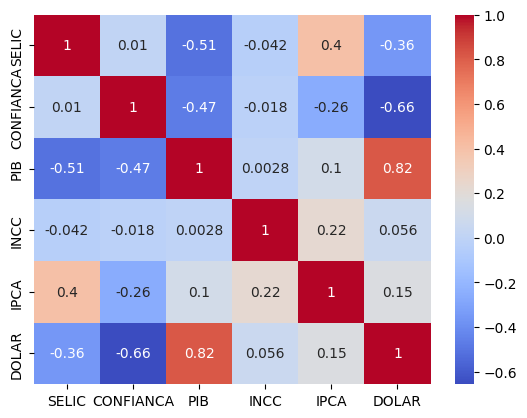

In [66]:
lista_macros = macros.columns
sns.heatmap(corr_macros, cmap='coolwarm',
            annot=True, fmt='.2g',
            xticklabels=lista_macros,
            yticklabels=lista_macros);

##### Criando gráficos

In [69]:
fig = make_subplots(rows=1, cols=1, specs=[[{'secondary_y': True}]])

fig.add_trace(go.Scatter(name='SELIC', x=macros.index, 
                         y=macros['SELIC']), row=1, col=1)
fig.add_trace(go.Scatter(name='IPCA', x=macros.index, 
                         y=macros['IPCA']), row=1, col=1, 
              secondary_y=False)

fig.update_layout(title_text= 'SELIC vs IPCA', 
                  template='simple_white')
fig.show()

In [70]:
fig = make_subplots(rows=1, cols=1, specs=[[{'secondary_y': True}]])

fig.add_trace(go.Scatter(name='PIB', x=macros.index, 
                         y=macros['PIB']), row=1, col=1)
fig.add_trace(go.Scatter(name='DOLAR', x=macros.index, 
                         y=macros['DOLAR']), row=1, col=1, 
              secondary_y=True)

fig.update_layout(title_text= 'PIB vs DOLAR', 
                  template='simple_white')
fig.show()

In [71]:
fig = make_subplots(rows=1, cols=1, specs=[[{'secondary_y': True}]])

fig.add_trace(go.Scatter(name='DOLAR', x=macros.index, 
                         y=macros['DOLAR']), row=1, col=1)
fig.add_trace(go.Scatter(name='CONFIANCA', x=macros.index, 
                         y=macros['CONFIANCA']), row=1, col=1, 
              secondary_y=True)

fig.update_layout(title_text= 'DOLAR vs CONFIANCA', 
                  template='simple_white')
fig.show()